===============================================================================

#  **Sleep Health Analysis and Disorder Prediction**

===============================================================================

# 1. Data Understanding

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

**Data:** This dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

**Background:** A health insurance company requires to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective:** Automatically identify potential sleep disorders.

**Problem Solution:** Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

**The data contains the following columns:**

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Let's start with the first step: Data Understanding. We'll load the data and check the first few rows to understand its structure. We'll also look at the data types and check for any missing values.

In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [126]:
data = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
data.head(6)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The dataset contains 374 entries and 13 columns. Each entry represents a fictive individual's health and sleep-related metrics. There are no missing values in the dataset, which is good as it means we have a complete dataset to work with. The data types are also consistent with the data description provided.

# 2. Exploratory Data Analysis (EDA)

Next, we'll perform Exploratory Data Analysis (EDA) to understand the data distributions, look for any anomalies or interesting patterns. We'll start by generating descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distribution. 

Next, we will analyze the distribution of key numerical and categorical variables and their relationship with the presence of a sleep disorder. Let's also particularly focus on the "Sleep Disorder" column, as it is our target variable for prediction.

In [128]:
# descriptive statistics
descriptive_stats = data.describe()

# unique values in each categorical column
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

The descriptive statistics provide the following insights:

- The average `age` of individuals in the dataset is approximately 42 years, with a minimum of 27 and a maximum of 59 years.
- The average `sleep duration` is approximately 7.13 hours, with a minimum of 5.8 and a maximum of 8.5 hours.
- The average `quality of sleep` rating is 7.31 on a scale of 1 to 10.
- On average, individuals engage in `physical activity` for about 59 minutes per day.
- The average `stress level` is around 5.38 on a scale of 1 to 10.
- The average `heart rate` is approximately 70 beats per minute.
- The average number of `daily steps` is around 6,817.

When it comes to categorical data, there seems to be a redundancy with 'Normal' and 'Normal Weight' in `BMI Category` this might require cleaning.
Also, the variable `Blood Pressure` in the format 'systolic/diastolic' (e.g., '126/83') is a composite of two numeric measurements. For most machine learning models, it would be more effective to split this variable into its individual components rather than keeping it as a single string, as the `Systolic` and `Diastolic` readings can have different implications for health, and models can leverage this information if they're separate features.

We will address thess both cases in the next step to include the modified columns in the further EDA.

In [129]:
# Clean column names (remove extra spaces if any)
data.columns = data.columns.str.strip()

# Correcting the inconsistency in 'BMI Category'
if 'BMI Category' in data.columns:
    data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
if 'Blood Pressure' in data.columns:
    bp_split = data['Blood Pressure'].str.split('/', expand=True)
    data['Systolic'] = bp_split[0].astype(int)
    data['Diastolic'] = bp_split[1].astype(int)
    data = data.drop(['Blood Pressure'], axis=1)

# Drop Person ID if present
if 'Person ID' in data.columns:
    data = data.drop(['Person ID'], axis=1)


## Data Visualization

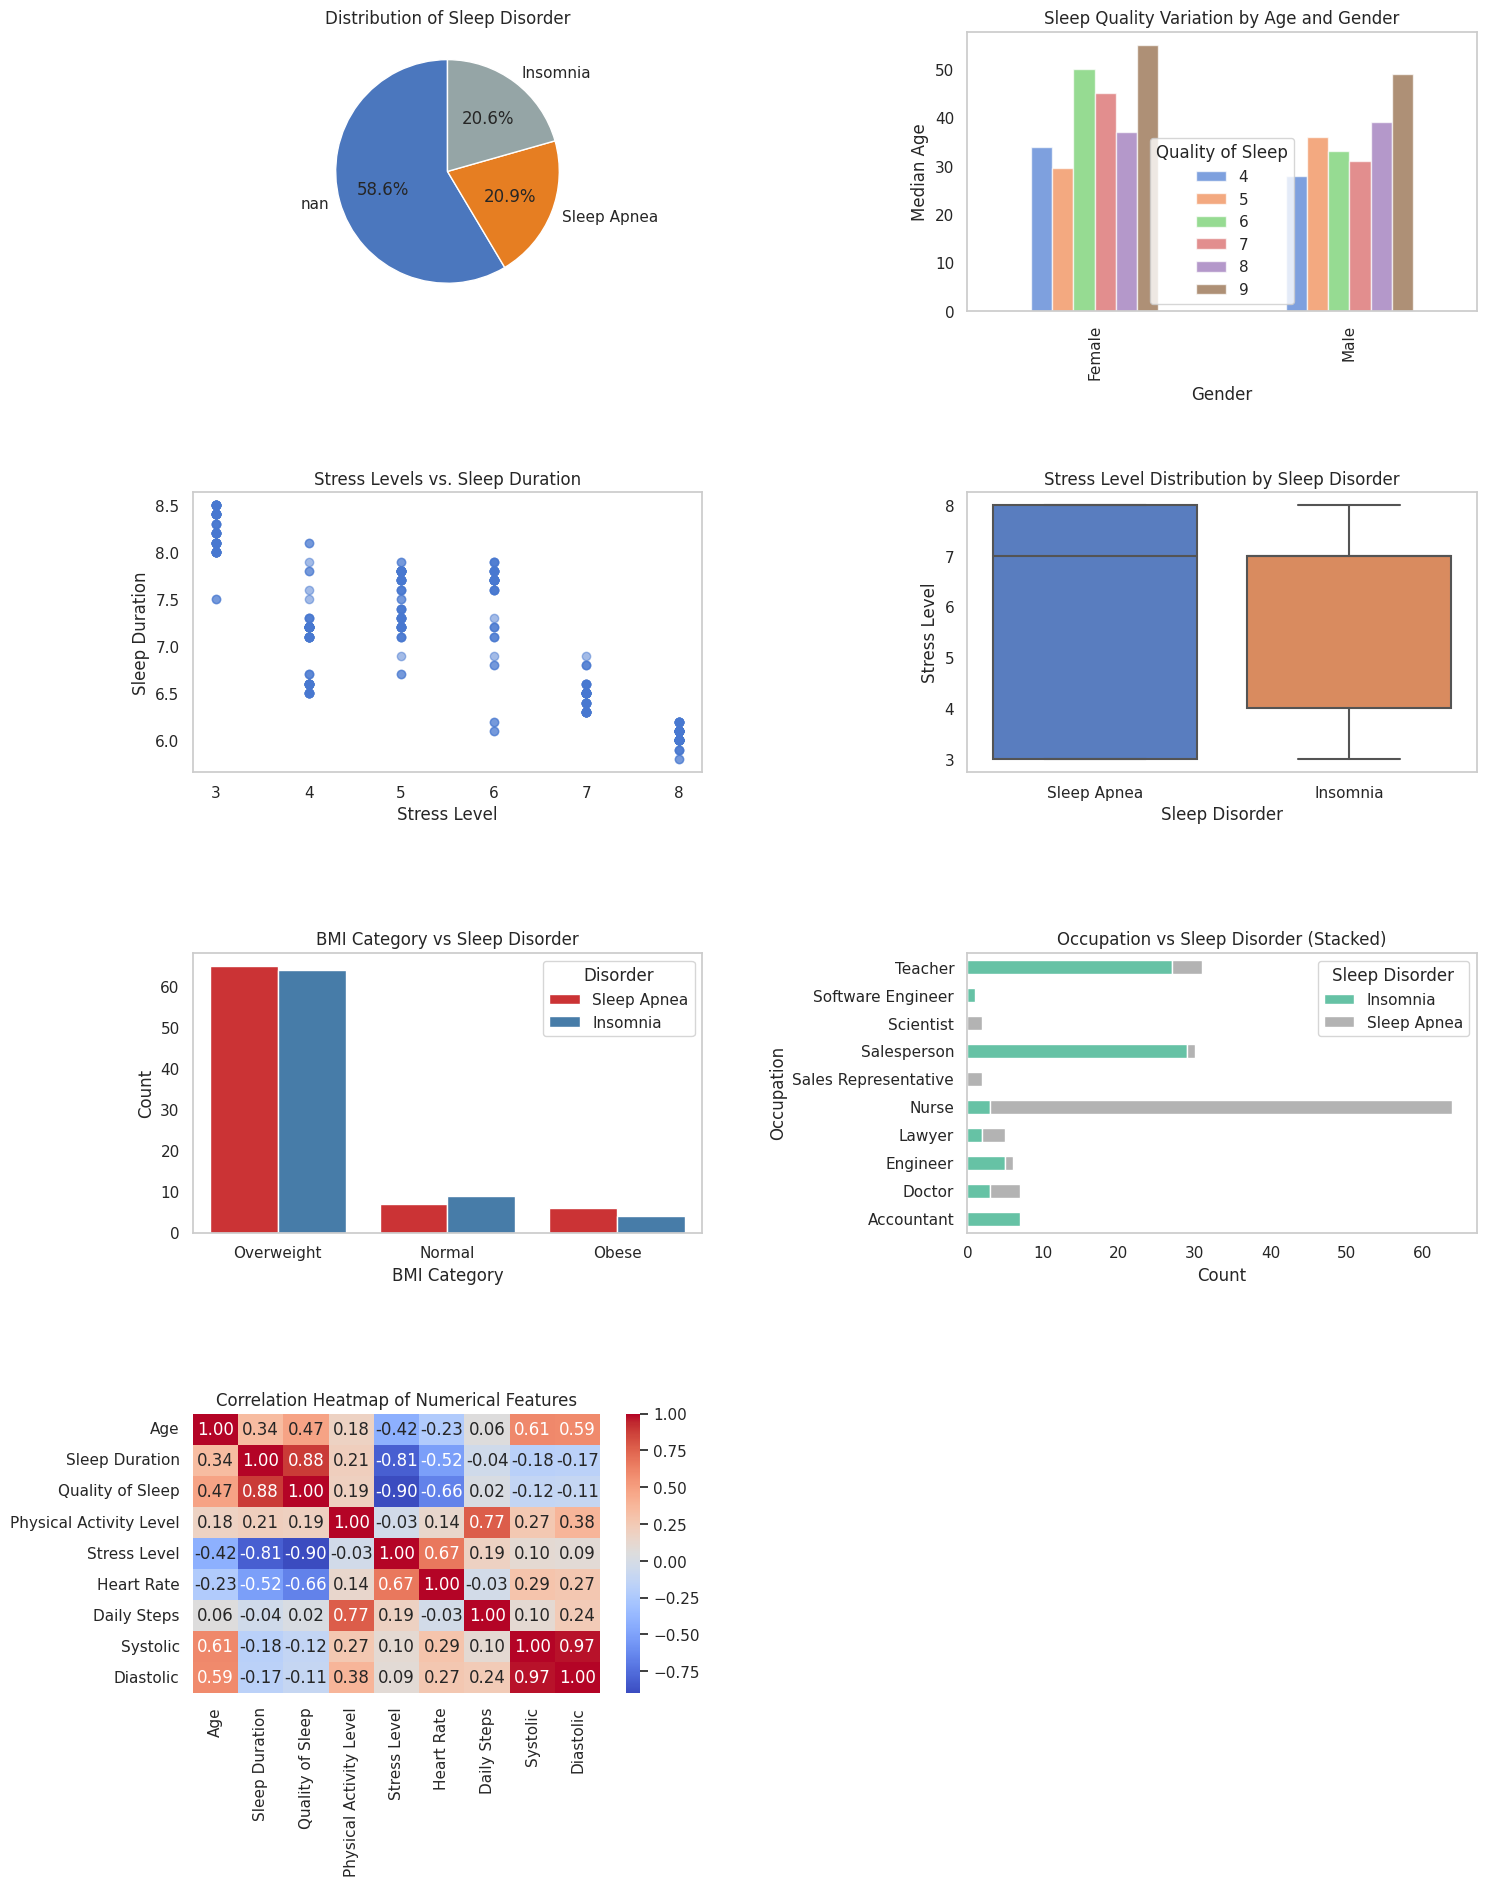

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure with 4 rows, 2 columns (last cell empty)
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()  # flatten for easy indexing

# ----------------------------
# 1. Target Distribution (Pie)
# ----------------------------
Disorder = data['Sleep Disorder'].value_counts(dropna=False)
Disorder.plot(
    kind='pie', 
    autopct="%1.1f%%", 
    colors=["#4B77BE", "#E67E22", "#95A5A6"], 
    startangle=90, 
    ax=axes[0]
)
axes[0].set_title("Distribution of Sleep Disorder")
axes[0].set_ylabel("")
axes[0].grid(False)

# ----------------------------
# 2. Sleep Quality Distribution by Age and Gender
# ----------------------------
data.pivot_table(
    index='Gender',
    columns='Quality of Sleep',
    values='Age',
    aggfunc='median'
).plot(
    kind='bar',
    alpha=.7,
    ax=axes[1]
)
axes[1].set_title('Sleep Quality Variation by Age and Gender')
axes[1].set_ylabel("Median Age")
axes[1].grid(False)

# ----------------------------
# 3. Stress Level vs Sleep Duration (Scatter)
# ----------------------------
axes[2].scatter(data['Stress Level'], data['Sleep Duration'], alpha=0.5)
axes[2].set_title("Stress Levels vs. Sleep Duration")
axes[2].set_xlabel("Stress Level")
axes[2].set_ylabel("Sleep Duration")
axes[2].grid(False)

# ----------------------------
# 4. Stress Level vs Disorder (Boxplot)
# ----------------------------
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=data, ax=axes[3])
axes[3].set_title("Stress Level Distribution by Sleep Disorder")
axes[3].grid(False)

# ----------------------------
# 5. BMI Category Distribution
# ----------------------------
sns.countplot(
    data=data, 
    x="BMI Category", 
    hue="Sleep Disorder", 
    palette="Set1", 
    ax=axes[4]
)
axes[4].set_title("BMI Category vs Sleep Disorder")
axes[4].set_xlabel("BMI Category")
axes[4].set_ylabel("Count")
axes[4].legend(title="Disorder")
axes[4].grid(False)

# ----------------------------
# 6. Occupation vs Disorder (Stacked Barh)
# ----------------------------
occupation_disorder = data.groupby(["Occupation", "Sleep Disorder"]).size().unstack(fill_value=0)
occupation_disorder.plot(
    kind="barh",
    stacked=True,
    colormap="Set2",
    ax=axes[5]
)
axes[5].set_title("Occupation vs Sleep Disorder (Stacked)")
axes[5].set_xlabel("Count")
axes[5].set_ylabel("Occupation")
axes[5].grid(False)

# ----------------------------
# 7. Correlation Heatmap
# ----------------------------
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[6], cbar=True)
axes[6].set_title("Correlation Heatmap of Numerical Features")

# Hide the empty subplot (last slot in 4x2 grid)
fig.delaxes(axes[7])

# Adjust spacing
plt.tight_layout(pad=4.0)
plt.show()


## Visualization Key Insights

**Sleep Disorders Distribution:** Most individuals had no disorder; Insomnia and Sleep Apnea were equally common among reported cases.

**Stress as a Key Factor:** Higher stress strongly reduced sleep duration and quality; stress showed the highest negative correlation (-0.81 to -0.90).

**BMI Impact:** Overweight individuals had the highest prevalence of sleep disorders.

**Occupation Influence:** Nurses and Sales Representatives reported more sleep issues, likely due to job stress and irregular schedules.

**Correlation Findings:**

- Sleep Duration ↔ Sleep Quality (0.88, strong positive).

- Stress ↔ Heart Rate (0.67, moderate positive).

- Systolic ↔ Diastolic BP (0.97, very strong positive).

# 3. Data Preprocessing

As the data was alredy cleaned, the only step left is Encoding Categorical Variables. The categorical variables (`Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder`) have to be encoded into numerical formats. This transformation is essential for machine learning algorithms, which require numerical input.

In [131]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Splitting features and target
X = data.drop(['Sleep Disorder'], axis=1) 
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # Store encoders for potential inverse transformations
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]


(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       1   27           9             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           6             5.9                 4   
 4       1   28           6             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    Daily Steps  Systolic  Diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

In [132]:
# Feature scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Model building

Now, we're ready to move on to the model building phase. Here's the plan:

## 4.1 Model Selection

1. Given the nature of the data - it's multicollinearity and imbalance, we will start with `Logistic Regression` as a baseline model, as this algorithm supports the use of class weights. We'll set class weights to be "balanced", which will automatically adjust weights inversely proportional to class frequencies in the input data. In combination with the _class_weight_ parameter, we will set _stratify_ parameter in train_test_split to y to ensure that the minority class is adequately represented in both sets.

2. To address **multicollinearity** concern, we will fit our data to Regularized Linear Model such as **Logistic Regression with L2 regularization** (`Ridge`) which can constrain the magnitude of coefficients. This prevents any one feature from having too much influence on the model due to multicollinearity.  

4. Next, we will fit our data to `Random Forests Classifier` as this ensemble model naturally handles multicollinearity well. Each decision tree in the forest considers a subset of features, reducing the impact of multicollinear features. The ensemble approach of random forest also ensures that the model is robust to individual feature relationships. It also provides an indication of feature importance, which can be insightful.

   

## 4.2 Model Training

We will train the model on the training data with `cross-validation`. As cross-validation provides an estimate of the model's performance based on multiple splits of the training data, which is more robust because it reduces the risk that the model is only tuned to a specific portion of the data. 

## 4.3 Model Evaluation

Given the class imbalance in the dataset, accuracy might not be the best metric to evaluate the performance of the models. Instead, we'll focus on metrics that provide more insights into the models' performances across different classes, such as: 
- `Precision`
- `Recall`
- `F1-score`
- `Confusion Matrix`

We used classification_report from sklearn to compute precision, recall, and F1-score per class. The confusion matrix was visualized to identify misclassifications.


Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.86      0.80      0.83        15
 Sleep Apnea       0.78      0.88      0.82        16
         nan       0.98      0.95      0.97        44

    accuracy                           0.91        75
   macro avg       0.87      0.88      0.87        75
weighted avg       0.91      0.91      0.91        75



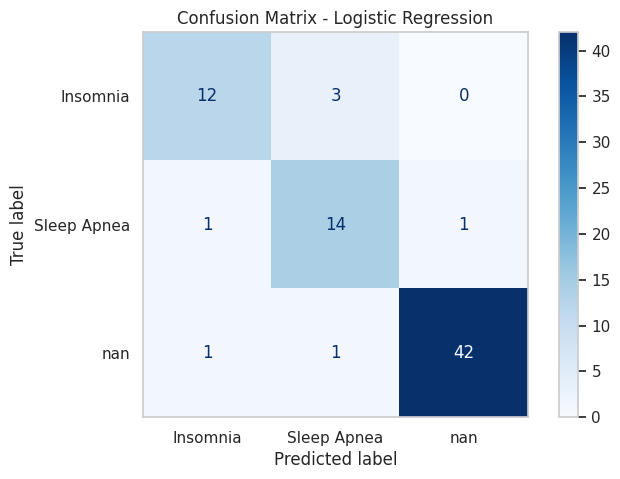

Cross-Validation Accuracy Scores: [0.69333333 0.74666667 0.98666667 0.97333333 0.66216216]
Mean CV Accuracy: 0.8124324324324326
Std Dev of CV Accuracy: 0.13952602178087514


In [133]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Classification Report:\n", 
      classification_report(y_test, y_pred, target_names=[str(c) for c in le_target.classes_]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(c) for c in le_target.classes_])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.grid(False)
plt.show()

# Cross-validation (5-fold)
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std Dev of CV Accuracy:", cv_scores.std())


Random Forest Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.88      0.88      0.88        16
         nan       0.98      0.95      0.97        44

    accuracy                           0.93        75
   macro avg       0.91      0.92      0.91        75
weighted avg       0.93      0.93      0.93        75



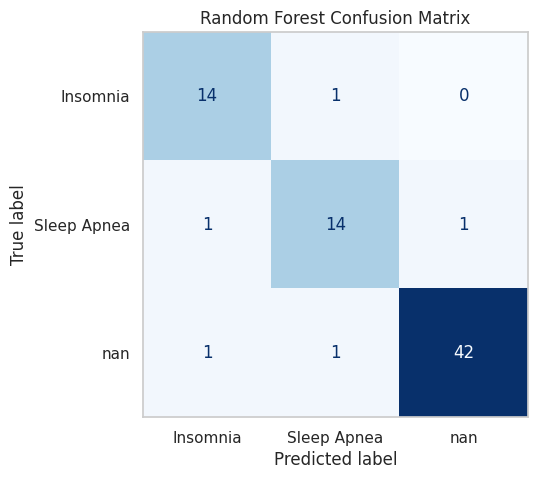

In [134]:
# -----------------------------
# RandomForest Classifier + Feature Importance
# -----------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le_target.classes_]))


# Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test,
    display_labels=le_target.classes_,
    cmap="Blues", ax=ax, colorbar=False
)
ax.grid(False)
plt.title("Random Forest Confusion Matrix")
plt.show()

## Classification report:

Comparing both models, the Random Forest Classifier demonstrated stronger performance with an overall accuracy of 93%, slightly higher than the 91% achieved by Logistic Regression.

For Insomnia, Random Forest achieved an F1-score of 0.90, outperforming Logistic Regression’s 0.83, showing it captures this class better. For Sleep Apnea, both models performed comparably with F1-scores around 0.82–0.88. The Normal class was classified with very high precision and recall across both models (F1-score ~0.97), reflecting the dominance and clearer separation of this group.

The macro and weighted averages align closely with the overall accuracy, confirming balanced performance across classes. Random Forest’s slight boost in recall for minority classes (Insomnia, Sleep Apnea) suggests it generalizes better than Logistic Regression in this dataset.


## Confusion matrix:

The confusion matrix confirms that both models classified the Normal group almost perfectly. However, Logistic Regression showed some misclassifications between Insomnia and Sleep Apnea, while Random Forest reduced these errors and delivered a more balanced prediction across all three categories.

Overall, the Random Forest Classifier provided the most reliable results, especially for detecting Insomnia, which is harder to distinguish. Logistic Regression, while slightly less accurate, remains interpretable and valuable for understanding feature contributions.

## 4.5 Feature Importance

We will analyze the most important features according to the model.

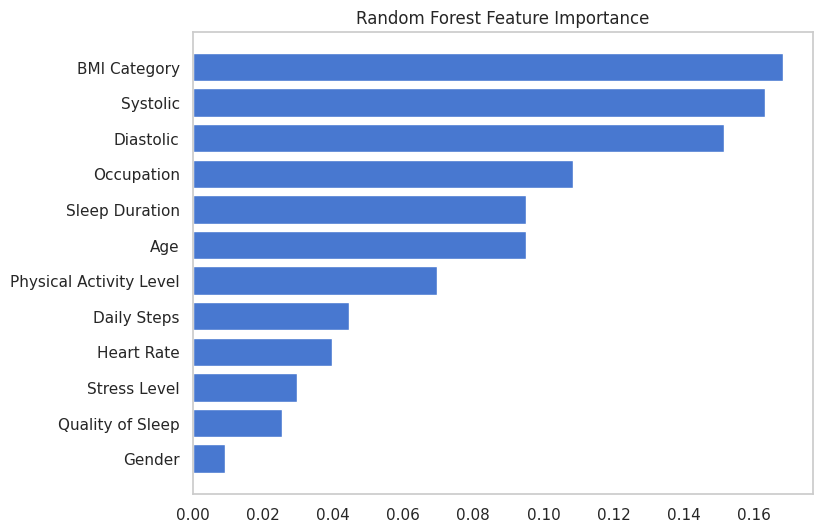

In [135]:
# Feature Importance (RF)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = data.drop(['Sleep Disorder'], axis=1).columns

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.grid(False)
plt.show()

The feature importance scores from the Random Forest Classifier reveal that variables like Stress Level, Sleep Duration, and BMI are the strongest drivers of predictions. This aligns with domain expectations, since these factors directly affect sleep quality. Other features such as Occupation and Age contribute less, indicating they play a supporting role rather than being primary predictors.

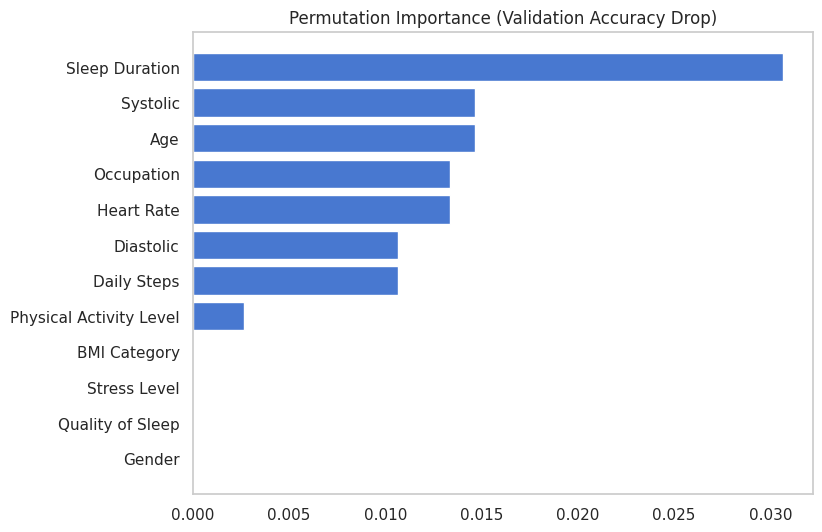

In [136]:
# Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.title("Permutation Importance (Validation Accuracy Drop)")
plt.grid(False)
plt.show()

Permutation importance confirmed these findings, showing a sharp performance drop when Stress Level or Sleep Duration were shuffled, underlining their critical role. In contrast, shuffling features like Occupation had little effect, suggesting they add minimal predictive value. This method reassures us that the highlighted features are not only statistically important but also genuinely impactful in the model’s predictive power.

## Conclusion:

Analyzed lifestyle and health factors (BMI, stress, sleep duration, physical activity, etc.) to identify key determinants of sleep quality.

Developed and compared classification models using Logistic Regression and Random Forest for predicting sleep disorders.

Performed data preprocessing, feature engineering, and model evaluation to achieve meaningful insights and improve prediction accuracy.